In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'rgb_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=6)

In [2]:
flag = 0
if flag:
    df = pd.read_csv("CP800_initial_3rd_RD_ND_EP_ebsd_output.txt",sep='\t')
else:
    df = pd.read_csv("CP800_initial_IMM_nano_2_ebsd_output.txt",sep='\t')

In [3]:
print(df.shape)
print(df['X'].max() *10, df['Y'].max() *10)
df.head(20)

(639999, 10)
799.0 799.0


,X,Y,Phase,Euler_1,Euler_2,Euler_3,grainId_5deg,GrainAverIQ,GOS,KAM
0,0.0,0.0,2,94.6760,44.7769,77.9489,108,121.946,1.20253,0.142367
1,0.1,0.0,2,94.6760,44.7769,77.9489,108,121.946,1.20253,0.244266
2,0.2,0.0,2,94.6760,44.7769,77.9489,108,121.946,1.20253,0.335433
3,0.3,0.0,2,94.4452,45.0341,78.5909,108,121.946,1.20253,0.434022
4,0.4,0.0,2,94.5414,44.8187,78.6874,108,121.946,1.20253,0.462535
5,0.5,0.0,2,94.3607,44.8965,78.9218,108,121.946,1.20253,0.501548
6,0.6,0.0,2,94.3607,44.8965,78.9218,108,121.946,1.20253,0.593769
7,0.7,0.0,2,93.5928,45.2577,79.5429,108,121.946,1.20253,0.749575
8,0.8,0.0,2,93.1171,45.4171,80.0898,108,121.946,1.20253,0.811478
9,0.9,0.0,2,92.8136,45.6619,80.1209,108,121.946,1.20253,0.741846


In [4]:
data_to_show = df[['X', 'Y', 'Phase', 'grainId_5deg']]
print('Phases: ', np.sort(data_to_show['Phase'].unique()))

print(np.max(data_to_show.grainId_5deg), len(np.unique(data_to_show.grainId_5deg)))
data_to_show.head(10)

Phases:  [1 2 3]
3499 3499


,X,Y,Phase,grainId_5deg
0,0.0,0.0,2,108
1,0.1,0.0,2,108
2,0.2,0.0,2,108
3,0.3,0.0,2,108
4,0.4,0.0,2,108
5,0.5,0.0,2,108
6,0.6,0.0,2,108
7,0.7,0.0,2,108
8,0.8,0.0,2,108
9,0.9,0.0,2,108


In [5]:
def make_image(row_range, col_range, values):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            image_tab[i][j] = values[i * (col_range+1) + j]
    
    return image_tab

In [6]:
## test ##
sq =[[0,0], [0,1], [0,2], [0,3],
     [1,0], [1,1], [1,2], [1,3],
     [2,0], [2,1], [2,2], [2,3],
     [3,0], [3,1], [3,2], [3,3]]
sq_df = pd.DataFrame(np.array(sq), columns=['Y', 'X'])
color = [1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4]
sq_df

,Y,X
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


In [7]:
## test ##
image_sq = make_image(sq_df['Y'].max(), sq_df['X'].max(), np.array(color))

4 4


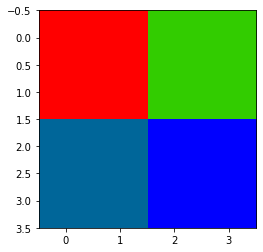

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [8]:
## test ##
plt.rcParams['figure.figsize'] = [4, 4]
plt.imshow(image_sq, cmap=cmap)
plt.show()
print(image_sq)

<function matplotlib.pyplot.show(close=None, block=None)>

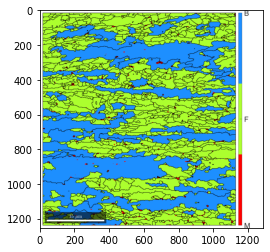

In [9]:
from PIL import Image

del sq, sq_df, image_sq

im = Image.open('Phase map.tif')
plt.imshow(im)
plt.show

In [10]:
image_matrix = make_image(int(data_to_show['Y'].max() *10), int(data_to_show['X'].max() *10), \
                           data_to_show['Phase'].values)

800 800


In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

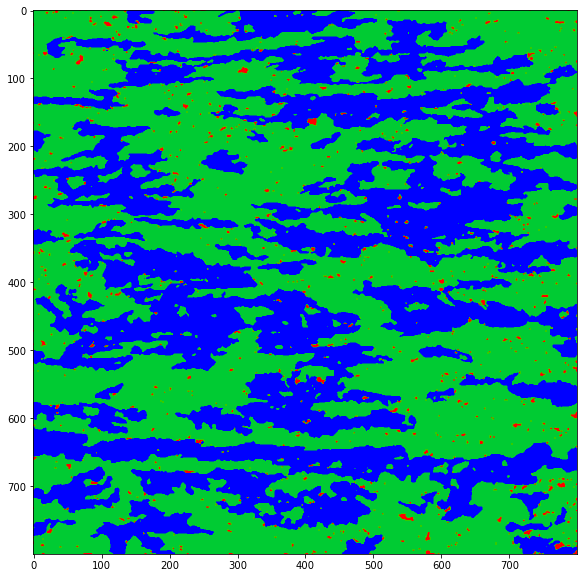

In [12]:
plt.imshow(image_matrix, cmap=cmap)
plt.show()

In [13]:
def display_grain_on_image(input_tab, grains, grain_number):
    output_tab = np.copy(input_tab)
    
    print(input_tab.shape[0], input_tab.shape[1])
    
    for i in range((input_tab.shape[0]) * (input_tab.shape[1]) - grains.shape[0]):
        grains = np.concatenate((grains, [grains[-1]]))
    
    for i in range(input_tab.shape[0]):
        for j in range(input_tab.shape[1]):
            
            if(grains[i * input_tab.shape[1] + j] == grain_number):
                output_tab[i][j] = 0
    
    return output_tab

In [14]:
grain_image_matrix = display_grain_on_image(image_matrix, data_to_show['grainId_5deg'].values, 50)

800 800


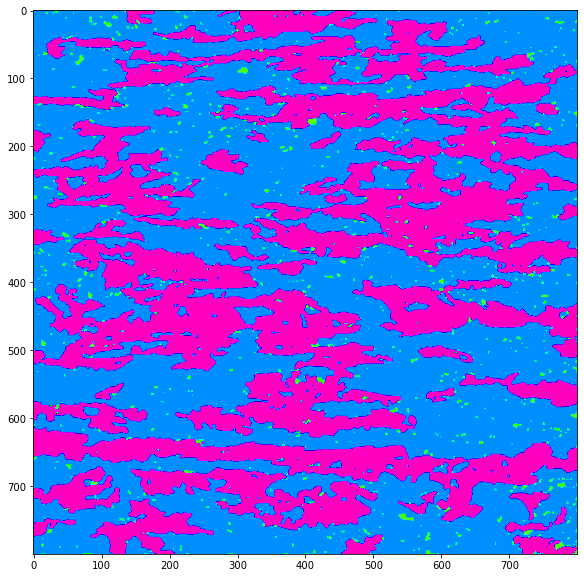

In [15]:
plt.imshow(grain_image_matrix, cmap=cm.get_cmap('gist_rainbow'))
plt.show()

In [16]:
def image_binarization_by_phase(row_range, col_range, values, phase):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            
            if(values[i * (col_range+1) + j] == phase):
                image_tab[i][j] = 1
            else:
                image_tab[i][j] = 0
    
    return image_tab

In [17]:
phase_image_matrix = image_binarization_by_phase(int(data_to_show['Y'].max()*10), int(data_to_show['X'].max()*10),\
                                                  data_to_show['Phase'].values, 3)

800 800


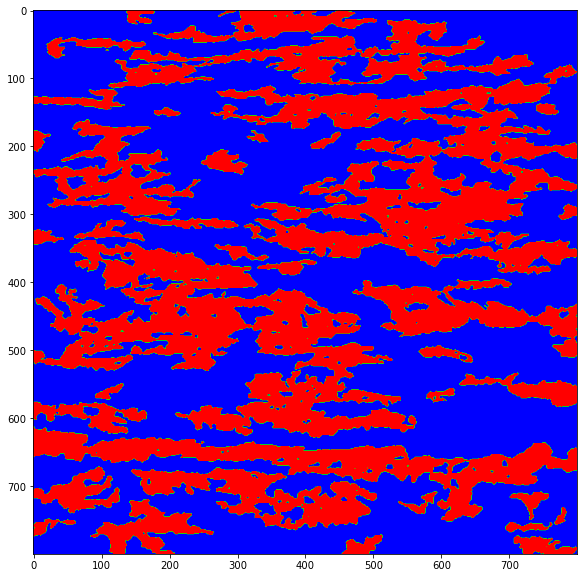

In [18]:
plt.imshow(phase_image_matrix, cmap=cmap.reversed())
plt.show()

In [19]:
def image_color_segmentation(input_tab, grains):
        output_tab = np.copy(input_tab)
        
        for i in range((input_tab.shape[0]+1) * (input_tab.shape[1]+1) - grains.shape[0]):
            grains = np.concatenate((grains, [grains[-1]]))
        
        
        for i in range(input_tab.shape[0]):
            for j in range(input_tab.shape[1]):
                output_tab[i][j] = np.remainder(grains[i * input_tab.shape[1] + j], 255)
        
        return output_tab / 255. #np.mod(grains, 255)/ 255.

In [20]:
segmentation_image_matrix = image_color_segmentation(image_matrix, data_to_show['grainId_5deg'].values)
segmentation_image_matrix = np.uint8(cm.gist_ncar(segmentation_image_matrix) *255)

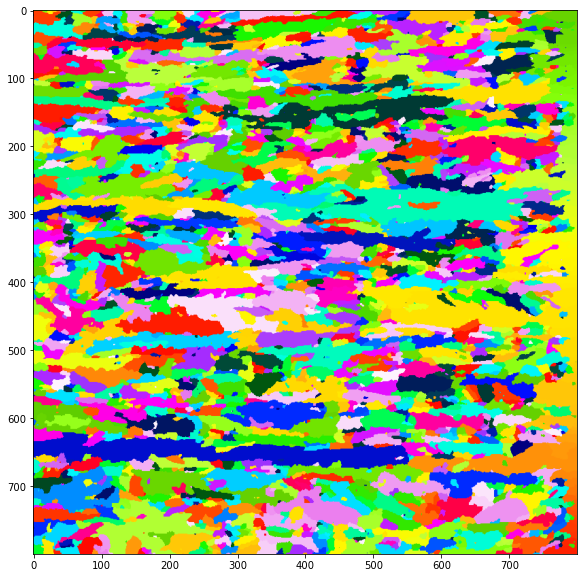

In [21]:
plt.imshow(segmentation_image_matrix)
plt.show()

In [22]:
del grain_image_matrix, phase_image_matrix, segmentation_image_matrix

In [23]:
grain1714 = data_to_show[data_to_show.grainId_5deg == 1714] # Phase: 3
pd.unique(grain1714.Phase)

array([1])

In [24]:
grain1387 = data_to_show[data_to_show.grainId_5deg == 1387] # Phase: 3
grain1686 = data_to_show[data_to_show.grainId_5deg == 1686] # Phase: 3

print(pd.unique(grain1387.Phase), pd.unique(grain1686.Phase))

[2 1] [2]


In [25]:
grains_df = pd.DataFrame({"Area": data_to_show['grainId_5deg'].value_counts()})

grains_df['Phase'] = list(map( lambda x: data_to_show.loc[data_to_show.grainId_5deg == x, \
                                    'Phase'].value_counts(sort=True).index[0],  grains_df.index))

print(grains_df.Phase.value_counts())
grains_df.head(20)

2    2624
1     656
3     219
Name: Phase, dtype: int64


,Area,Phase
2320,14327,3
3123,13266,3
3459,8417,3
2558,7551,3
1139,5758,3
3481,5547,3
1525,4449,3
547,4174,3
1815,3809,3
3254,3806,3


In [26]:
def get_phase_area(x, phase):
    result_sum = sum(x[x.Phase == phase]['Phase'].tolist())
    return result_sum


phase_1_area = get_phase_area(df, 1)
phase_2_area = get_phase_area(df, 2)
phase_3_area = get_phase_area(df, 3)

del df
print('Sum of areas occupied by phases (1,2,3):', phase_1_area, phase_2_area, phase_3_area)

Sum of areas occupied by phases (1,2,3): 8086 754700 763689


In [27]:
print("Grains amount before:", grains_df.shape[0])

def remove_border_grains(df, data):
    ### Code for deletion of border grains. ###
    
    border_limit_x = int(data['X'].max() *10)
    border_limit_y = int(data['Y'].max() *10)
    
    for i in [0, border_limit_x]:
        for j in range(border_limit_y):
            
            gr_num = data.loc[(data['X'] == i/10) & (data['Y'] == j/10), 'grainId_5deg'].values[0]
            
            if gr_num in set(df.index):
                df.drop(gr_num, inplace=True)
                
    for i in range(border_limit_x):
        for j in [0, border_limit_y]:
            
            gr_num = data.loc[(data['X'] == i/10) & (data['Y'] == j/10), 'grainId_5deg'].values[0]
            
            if gr_num in set(df.index):
                df.drop(gr_num, inplace=True)
                
    print("Grains amount after:", df.shape[0])
    
    return df

grains_df = remove_border_grains(grains_df, data_to_show)

Grains amount before: 3499
Grains amount after: 3230


Text(0.5, 1.0, 'Pareto distribution')

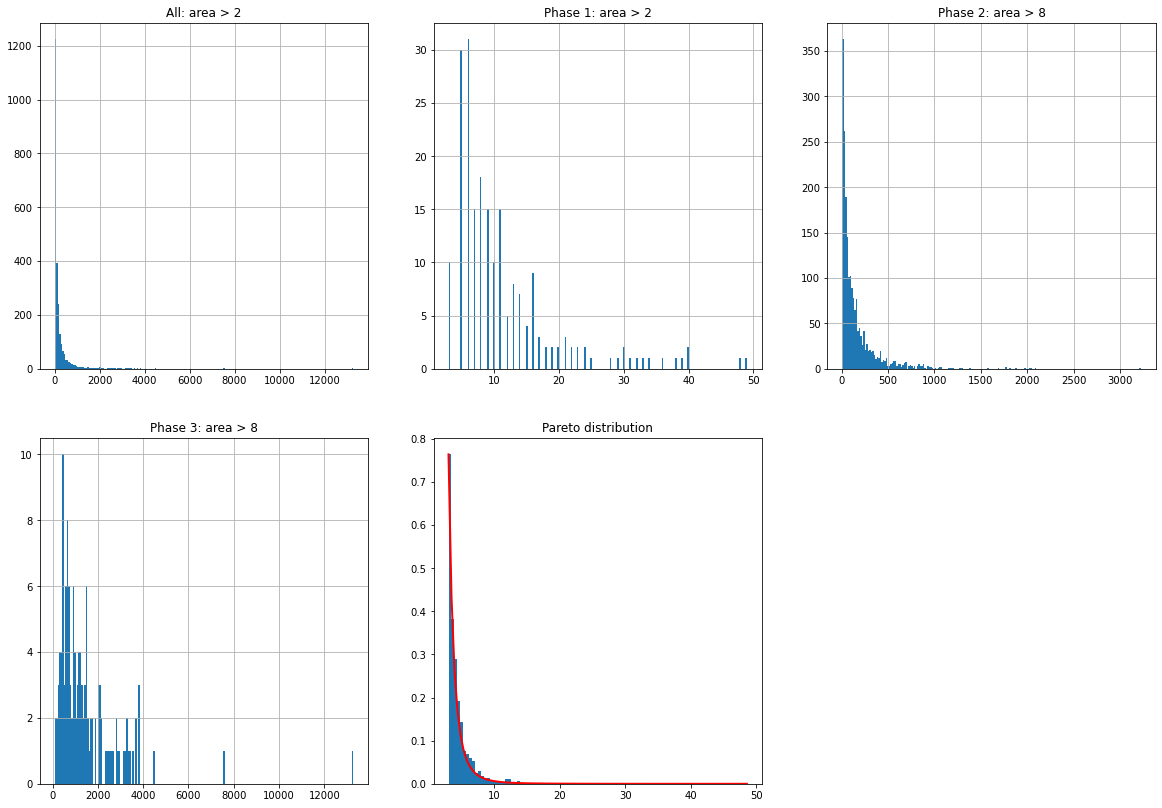

In [28]:
plt.rcParams['figure.figsize'] = [20, 14]
fig = plt.figure()

fig.add_subplot(231)
grains_df.loc[grains_df['Area'] > 2]['Area'].hist(bins=200)
plt.title('All: area > 2')

fig.add_subplot(232)
grains_df.loc[(grains_df['Phase'] == 1) & (grains_df['Area'] > 2)]['Area'].hist(bins=200)
plt.title('Phase 1: area > 2')

fig.add_subplot(233)
grains_df.loc[(grains_df['Phase'] == 2) & (grains_df['Area'] >= 8)]['Area'].hist(bins=200)
plt.title('Phase 2: area > 8')


fig.add_subplot(234)
grains_df.loc[(grains_df['Phase'] == 3) & (grains_df['Area'] >= 8)]['Area'].hist(bins=200)
plt.title('Phase 3: area > 8')

fig.add_subplot(235)
a, m = 3., 3.
s = (np.random.pareto(a, 1000) + 1) * m

count, bins, _ = plt.hist(s, 100, density=True)
fit = a * m**a / bins **(a+1)
plt.plot(bins, max(count)*fit / max(fit), linewidth=2, color='r')
plt.title('Pareto distribution')

In [29]:
import cv2
from scipy import ndimage
from skimage import measure

struct = np.ones((3,3))
                 
def measure_regionprops(mask, img):
    labeled_mask, _ = ndimage.label(mask, structure=struct)
    clusters = measure.regionprops(labeled_mask, img)
    return clusters

In [30]:
grains = data_to_show['grainId_5deg'].values


for i in range((image_matrix.shape[0]) * (image_matrix.shape[1]) - grains.shape[0]):
    grains = np.concatenate((grains, [grains[-1]]))

tmp = grains.reshape(image_matrix.shape)
perimeter = []; major_axis = []; minor_axis = []; eccentricity = []; equivalent_diameter = []
X = [];  Y = []; bbox = []; orientation = []



for i in grains_df.index:
    
    mask = tmp == i
    clusters = measure_regionprops(mask, tmp)
    
    perimeter.append(clusters[0].perimeter)
    Y.append(clusters[0].centroid[0])
    X.append(clusters[0].centroid[1])
    major_axis.append(clusters[0].major_axis_length)
    minor_axis.append(clusters[0].minor_axis_length)
    eccentricity.append(clusters[0].eccentricity)
    equivalent_diameter.append(clusters[0].equivalent_diameter)
    bbox.append(clusters[0].bbox)
    orientation.append(clusters[0].orientation)


bbox = np.array(bbox)
grains_df['Perimeter'] = perimeter
grains_df['y'] = Y
grains_df['x'] = X
grains_df['orientation'] = orientation
grains_df['Major axis']  = major_axis
grains_df['Minor axis']  = minor_axis

In [31]:
class ShapeCoeffsStored:
    
    def __init__(self, area, perimeter, Y, X, major_axis, minor_axis,\
                    eccentricity, equivalent_diameter, bbox, orientation, indices, image):
        self.area = area
        self.perimeter = perimeter
        self.y = Y
        self.x = X
        self.major_axis = major_axis
        self.minor_axis = minor_axis
        self.eccentricity = eccentricity
        self.equivalent_diameter = equivalent_diameter
        self.bbox = bbox
        self.orientation = orientation
        self.indices = indices
        self.image = image

In [32]:
params = [np.array(i) for i in [perimeter, Y, X, major_axis, \
                            minor_axis, eccentricity, equivalent_diameter, bbox, orientation]]

coeffs_obj = ShapeCoeffsStored(grains_df['Area'].to_numpy(), *params, grains_df.index, tmp)

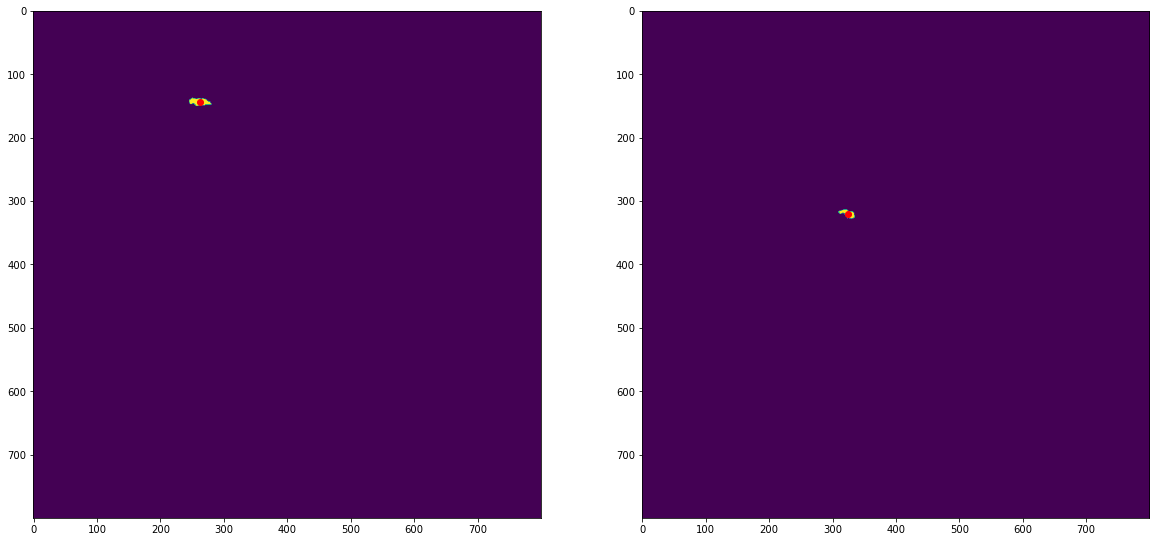

In [33]:
fig = plt.figure()

fig.add_subplot(121)
mask = tmp == 1200
plt.imshow(mask)
plt.plot(grains_df['x'].loc[1200], grains_df['y'].loc[1200], 'ro')

fig.add_subplot(122)
mask = tmp == 1432
plt.imshow(mask)
plt.plot(grains_df['x'].loc[1432], grains_df['y'].loc[1432], 'ro')

plt.rcParams['figure.figsize'] = [6, 12]
plt.show()

In [34]:
### Shape coefficients functions ###

def Zeta1(x):
    return 2 * (x.major_axis + x.minor_axis) / x.perimeter

def Zeta2(x):
    return x.perimeter / (4 * np.sqrt(x.area))

def Zeta3(x): # mimośród
    return x.eccentricity

def Zeta4(x):
    return x.perimeter / np.pi

def Zeta5(x):
    return x.equivalent_diameter

def Zeta6(x): # Malinowska
    return 2 * np.sqrt(np.pi * x.area) / x.perimeter

def Zeta7(x): # Feret
    return (x.bbox[:,3] - x.bbox[:,1]) / (x.bbox[:,2] - x.bbox[:,0])

def Zeta8(x, data): # Blair-Bliss
    x_iter = iter(x.x)
    y_iter = iter(x.y)
    tmp_array = list(map( lambda i: np.power(np.sqrt( \
                np.power( next(x_iter) - data.loc[data['grainId_5deg']==i]['X'] *10, 2).tolist() + \
                np.power( next(y_iter) - data.loc[data['grainId_5deg']==i]['Y'] *10, 2).tolist()), 2) ,\
                x.indices))
    return x.area / np.sqrt(2 * np.pi * np.array([np.sum(i) for i in tmp_array]))

def get_contours(x):
    return_list = list(map(lambda i: cv2.findContours(\
                            np.uint8(cv2.threshold(np.uint8( x.image == i ), 0, 1, cv2.THRESH_BINARY)[1]), \
                            cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0], \
                            x.indices))
    return_list = np.squeeze(np.array(return_list))
    
    if isinstance(return_list[0][0], (list, np.ndarray)):
        return np.array([np.array([i[0] for i in lst]) for lst in return_list])
    if isinstance(return_list[0][0], int):
        return np.array([[np.array([i for i in lst]) for lst in return_list]])
    else:
        return np.array([return_list])

def Zeta9(x): # Haralick
    contours = get_contours(x)
    n = iter([i.shape[0] for i in contours])
    
    if np.any(np.array(n) == 0):
        return None
    
    x_iter, y_iter = iter(x.x), iter(x.y)
    numerator = np.array([ np.power( np.sum( \
                        np.sqrt(np.power(next(x_iter) - i[:,0], 2) + np.power(next(y_iter) - i[:,1], 2))), 2) \
                        for i in contours])
    
    x_iter, y_iter = iter(x.x), iter(x.y)
    denominator = np.array([( next(n) * np.sum( np.power(\
                        np.sqrt(np.power(next(x_iter) - i[:,0], 2) + np.power(next(y_iter) - i[:,1], 2)), 2))) - 1\
                        for i in contours])
    
    return np.sqrt(np.divide(numerator, denominator, out=np.ones_like(numerator), where=denominator!=0))

def get_distances(x, contours):
    x_iter, y_iter = iter(x.x), iter(x.y)
    return np.array([np.sqrt(np.power(next(x_iter) - i[:,0], 2) + np.power(next(y_iter) - i[:,1], 2)) \
                        for i in contours])

def Zeta10(x):
    contours = get_contours(x)
    
    dists = get_distances(x, contours)
    
    return np.array([np.min(i) for i in dists]) / np.array([np.max(i) for i in dists])

def Zeta11(x):
    return x.major_axis / x.perimeter

def Zeta12(x, data): # Danielsson
    contours = get_contours(x)
    
    min_list = [np.min(np.sqrt(\
                np.power(contours[i][:,0,None] - (data.loc[data['grainId_5deg']==elem]['X']*10).tolist(), 2) + \
                np.power(contours[i][:,1,None] - (data.loc[data['grainId_5deg']==elem]['Y']*10).tolist(), 2)), \
                axis=0) for i, elem in enumerate(x.indices)]
    
    return np.power(x.area, 3) / np.power(np.array([np.sum(i) for i in min_list]), 2)

In [35]:
function_dict = {
    'Zeta1': Zeta1,
    'Zeta2': Zeta2,
    'Zeta3': Zeta3, # eccentricity
    'Zeta4': Zeta4,
    'Zeta5': Zeta5,
    'Zeta6': Zeta6, # Malinowska
    'Zeta7': Zeta7, # Feret
    'Zeta8': Zeta8, # Blair-Bliss
    'Zeta9': Zeta9, # Harlick
    'Zeta10': Zeta10,
    'Zeta11': Zeta11,
    'Zeta12': Zeta12 # Danielsson
}

In [36]:
grains_df['Zeta1'] = Zeta1(coeffs_obj)
grains_df['Zeta2'] = Zeta2(coeffs_obj)
grains_df['Zeta3'] = Zeta3(coeffs_obj)
grains_df['Zeta4'] = Zeta4(coeffs_obj)
grains_df['Zeta5'] = Zeta5(coeffs_obj)
grains_df['Zeta6'] = Zeta6(coeffs_obj)
grains_df['Zeta7'] = Zeta7(coeffs_obj)
grains_df['Zeta8'] = Zeta8(coeffs_obj, data_to_show)
grains_df['Zeta9'] = Zeta9(coeffs_obj)
grains_df['Zeta10'] = Zeta10(coeffs_obj)
grains_df['Zeta11'] = Zeta11(coeffs_obj)
#grains_df['Zeta12'] = Zeta12(coeffs_obj, data_to_show)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/939598480.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 2 * (x.major_axis + x.minor_axis) / x.perimeter
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/939598480.py:4: RuntimeWarning: invalid value encountered in true_divide
  return 2 * (x.major_axis + x.minor_axis) / x.perimeter
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/939598480.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 2 * np.sqrt(np.pi * x.area) / x.perimeter
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/939598480.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return x.area / np.sqrt(2 * np.pi * np.array([np.sum(i) for i in tmp_array]))
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/939598480.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

In [37]:
grains_df

,Area,Phase,Perimeter,y,x,orientation,Major axis,Minor axis,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
3123,13266,3,1694.733152,286.702548,555.003015,-1.560537,405.567222,55.261524,0.543836,3.678505,0.990673,539.450317,129.964594,0.240920,6.935484,0.449037,0.904167,0.094150,0.239310
2558,7551,3,1298.809271,149.678983,467.748378,-1.518464,367.473748,41.628374,0.629965,3.736656,0.993563,413.423831,98.052189,0.237171,6.923077,0.374953,0.886378,0.051417,0.282931
1525,4449,3,584.173665,442.989661,278.022477,1.312058,159.256365,47.100593,0.706492,2.189529,0.955264,185.948253,75.263821,0.404757,2.661290,0.640908,0.916110,0.171669,0.272618
1815,3809,3,513.652850,593.601208,356.531636,-1.558224,140.805657,38.534514,0.698293,2.080675,0.961823,163.500780,69.640286,0.425932,3.444444,0.674640,0.921108,0.157191,0.274126
3254,3806,3,493.190909,201.989228,681.029427,1.558648,169.544024,33.338311,0.822733,1.998576,0.980477,156.987542,69.612856,0.443429,4.621622,0.569750,0.889593,0.000348,0.343770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,2,0.000000,412.000000,415.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN
3295,1,2,0.000000,531.000000,776.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN
1246,1,2,0.000000,27.000000,288.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN
3293,1,3,0.000000,367.000000,776.000000,0.785398,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.128379,inf,1.000000,inf,-0.000000,NaN,NaN


In [38]:
del data_to_show, grains, tmp
del perimeter, major_axis, minor_axis, eccentricity, equivalent_diameter
del X,  Y, bbox, orientation

In [39]:
#grains_df = grains_df.loc[grains_df['Area'] > 2]
print(grains_df.shape)
grains_df.head(20)

(3230, 19)


,Area,Phase,Perimeter,y,x,orientation,Major axis,Minor axis,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
3123,13266,3,1694.733152,286.702548,555.003015,-1.560537,405.567222,55.261524,0.543836,3.678505,0.990673,539.450317,129.964594,0.240920,6.935484,0.449037,0.904167,0.094150,0.239310
2558,7551,3,1298.809271,149.678983,467.748378,-1.518464,367.473748,41.628374,0.629965,3.736656,0.993563,413.423831,98.052189,0.237171,6.923077,0.374953,0.886378,0.051417,0.282931
1525,4449,3,584.173665,442.989661,278.022477,1.312058,159.256365,47.100593,0.706492,2.189529,0.955264,185.948253,75.263821,0.404757,2.661290,0.640908,0.916110,0.171669,0.272618
1815,3809,3,513.652850,593.601208,356.531636,-1.558224,140.805657,38.534514,0.698293,2.080675,0.961823,163.500780,69.640286,0.425932,3.444444,0.674640,0.921108,0.157191,0.274126
3254,3806,3,493.190909,201.989228,681.029427,1.558648,169.544024,33.338311,0.822733,1.998576,0.980477,156.987542,69.612856,0.443429,4.621622,0.569750,0.889593,0.000348,0.343770
3205,3783,3,464.433550,121.971980,682.680412,-1.547190,182.543292,30.330676,0.916704,1.887754,0.986099,147.833790,69.402199,0.469461,4.820513,0.530406,0.877541,0.055296,0.393045
2574,3680,3,620.522907,338.003533,510.415489,1.522371,246.891787,25.145929,0.876802,2.557254,0.994800,197.518576,68.450869,0.346554,6.105263,0.390073,0.884779,0.025248,0.397877
1204,3653,3,457.540151,462.257870,206.093895,1.543585,158.981279,34.172152,0.844312,1.892537,0.976626,145.639553,68.199297,0.468275,3.404255,0.593118,0.900677,0.135067,0.347470
869,3522,3,554.380772,259.190801,133.570131,-1.539977,153.993314,37.149649,0.689573,2.335358,0.970465,176.464880,66.965287,0.379482,3.690476,0.597832,0.922302,0.150680,0.277775
1419,3447,3,544.025433,393.885117,264.466493,-1.547840,146.550497,35.885957,0.670691,2.316533,0.969556,173.168674,66.248447,0.382566,4.097561,0.620952,0.905673,0.144674,0.269382


In [40]:
df = grains_df[['Zeta1', 'Zeta2', 'Zeta3', 'Zeta4', 'Zeta5', \
                'Zeta6', 'Zeta7', 'Zeta8', 'Zeta9', 'Zeta10', 'Zeta11']]
df.drop(df[np.isnan(df['Zeta1'])].index, inplace=True)
df

/Users/krzysiu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
3123,0.543836,3.678505,0.990673,539.450317,129.964594,0.240920,6.935484,0.449037,0.904167,0.094150,0.239310
2558,0.629965,3.736656,0.993563,413.423831,98.052189,0.237171,6.923077,0.374953,0.886378,0.051417,0.282931
1525,0.706492,2.189529,0.955264,185.948253,75.263821,0.404757,2.661290,0.640908,0.916110,0.171669,0.272618
1815,0.698293,2.080675,0.961823,163.500780,69.640286,0.425932,3.444444,0.674640,0.921108,0.157191,0.274126
3254,0.822733,1.998576,0.980477,156.987542,69.612856,0.443429,4.621622,0.569750,0.889593,0.000348,0.343770
...,...,...,...,...,...,...,...,...,...,...,...
2467,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf
2586,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf
245,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf
1561,inf,0.000000,1.000000,0.000000,1.595769,inf,2.000000,1.128379,1.000000,1.000000,inf


In [41]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.describe()

/Users/krzysiu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/2367779004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,1.300597,1.094998,0.846637,19.257898,12.551992,0.906725,1.912955,0.812255,0.944096,0.278932,0.446696
std,0.432909,0.359804,0.135161,27.199316,10.765643,0.416101,0.995340,0.139072,0.035759,0.154277,0.196882
min,0.543836,0.144338,0.000000,0.318310,1.954410,0.237171,0.333333,0.273073,0.755929,0.000000,0.225574
25%,1.101154,0.861433,0.790569,5.433890,5.527906,0.696763,1.250000,0.717902,0.920105,0.157797,0.378206
50%,1.215579,1.046488,0.883613,11.378206,9.440697,0.846859,1.666667,0.838786,0.946185,0.261854,0.419495
75%,1.397548,1.271920,0.945857,22.566638,15.756958,1.028783,2.333333,0.922961,0.968940,0.387481,0.469839
max,6.531973,3.736656,1.000000,539.450317,129.964594,6.139960,9.304348,1.036482,1.132828,0.745356,3.265986


In [42]:
df['Phase'] = list( map(lambda x: grains_df.loc[grains_df.index == x, 'Phase'].values[0], df.index))

df.Phase.value_counts()

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/426297573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Phase'] = list( map(lambda x: grains_df.loc[grains_df.index == x, 'Phase'].values[0], df.index))


2    2107
1     211
3     134
Name: Phase, dtype: int64

In [43]:
df

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11,Phase
3123,0.543836,3.678505,0.990673,539.450317,129.964594,0.240920,6.935484,0.449037,0.904167,0.094150,0.239310,3
2558,0.629965,3.736656,0.993563,413.423831,98.052189,0.237171,6.923077,0.374953,0.886378,0.051417,0.282931,3
1525,0.706492,2.189529,0.955264,185.948253,75.263821,0.404757,2.661290,0.640908,0.916110,0.171669,0.272618,3
1815,0.698293,2.080675,0.961823,163.500780,69.640286,0.425932,3.444444,0.674640,0.921108,0.157191,0.274126,3
3254,0.822733,1.998576,0.980477,156.987542,69.612856,0.443429,4.621622,0.569750,0.889593,0.000348,0.343770,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2.133864,0.492799,0.816497,1.086778,1.954410,1.798353,1.000000,1.036482,1.132828,0.632456,0.676408,1
2591,2.133864,0.492799,0.816497,1.086778,1.954410,1.798353,1.000000,1.036482,1.132828,0.632456,0.676408,2
2881,2.133864,0.492799,0.816497,1.086778,1.954410,1.798353,1.000000,1.036482,1.132828,0.632456,0.676408,1
3392,6.531973,0.144338,1.000000,0.318310,1.954410,6.139960,3.000000,0.846284,0.755929,0.000000,3.265986,2


In [44]:
def get_mean_phase_area(x, y, phase):
    phase_in_x = x.loc[x.Phase == phase].index
    result_sum = sum(list(map(lambda i: y[y.index == i].Area.values, phase_in_x)))[0]
    return result_sum / len(phase_in_x), result_sum

phase_1_mean_area, phase_1_area_after = get_mean_phase_area(df, grains_df, 1)
phase_2_mean_area, phase_2_area_after = get_mean_phase_area(df, grains_df, 2)
phase_3_mean_area, phase_3_area_after = get_mean_phase_area(df, grains_df, 3)

print('Mean: Phase 1:', phase_1_mean_area, 'Phase 2:', phase_2_mean_area, 'Phase 3:', phase_3_mean_area)

Mean: Phase 1: 11.417061611374407 Phase 2: 154.70099667774087 Phase 3: 1478.7835820895523


In [45]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 10]
plt.style.use('ggplot')

In [46]:
def createKMean(T, n_clusters):
    model = KMeans(n_clusters=n_clusters)
    model.fit(T)

    print(model.cluster_centers_, '\n\n', model.labels_)
    
    return model

def makePCA(n_dims, T, kmeans):
    model = PCA(n_components=n_dims, svd_solver='randomized', random_state=7)
    model.fit(T)
    
    T  = model.transform(T)
    CC = model.transform(kmeans.cluster_centers_)
    
    return T, CC

def display3d(T, CC, model):
    c = ['red', 'green', 'blue', 'purple', 'orange']
    
    fig = plt.figure()
    
    ax  = fig.add_subplot(projection='3d')
    ax.set_title('KMeans')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    sample_colors = [ c[model.labels_[i]] for i in range(len(T)) ]
    ax.scatter(T[:, 0], T[:, 1], T[:, 2], c=sample_colors, marker='o', alpha=0.2)
    ax.scatter(CC[:, 0], CC[:, 1], CC[:, 2], marker='.', s=169, linewidths=3, zorder=1000, c='black')

    for i in range(len(model.cluster_centers_)):
        ax.text(CC[i, 0], CC[i, 1], CC[i, 2], str(i), fontsize=16, color=c[i])
    
    plt.show()

In [47]:
corr = df.loc[df['Phase'] == 1, df.columns != 'Phase'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
Zeta1,1.00,-0.69,0.20,-0.49,-0.46,0.96,0.19,-0.04,-0.27,-0.16,0.96
Zeta2,-0.69,1.00,0.07,0.93,0.88,-0.73,0.18,-0.52,-0.24,-0.30,-0.52
Zeta3,0.20,0.07,1.00,0.09,0.03,0.09,0.49,-0.59,-0.45,-0.68,0.35
Zeta4,-0.49,0.93,0.09,1.00,0.97,-0.53,0.19,-0.54,-0.26,-0.32,-0.32
Zeta5,-0.46,0.88,0.03,0.97,1.00,-0.51,0.17,-0.51,-0.28,-0.29,-0.31
Zeta6,0.96,-0.73,0.09,-0.53,-0.51,1.00,0.09,0.18,-0.14,-0.01,0.92
Zeta7,0.19,0.18,0.49,0.19,0.17,0.09,1.00,-0.60,-0.54,-0.52,0.35
Zeta8,-0.04,-0.52,-0.59,-0.54,-0.51,0.18,-0.60,1.00,0.71,0.78,-0.22
Zeta9,-0.27,-0.24,-0.45,-0.26,-0.28,-0.14,-0.54,0.71,1.00,0.80,-0.44
Zeta10,-0.16,-0.30,-0.68,-0.32,-0.29,-0.01,-0.52,0.78,0.80,1.00,-0.33


In [48]:
"""
    for Phase 1  austenite
"""
scaler = Normalizer
coeffs_1 = ['Zeta1','Zeta6','Zeta11']
T = scaler().fit_transform( df.loc[df['Phase'] == 1, df.columns.isin(coeffs_1)] )
T

array([[0.81995284, 0.47274613, 0.32278233],
       [0.84818122, 0.45618814, 0.26922297],
       [0.81224102, 0.5153147 , 0.27334097],
       [0.80444186, 0.51314115, 0.29926484],
       [0.79069632, 0.54162834, 0.28537358],
       [0.78612731, 0.56096774, 0.25945913],
       [0.81367493, 0.48936032, 0.31378269],
       [0.82042799, 0.46141544, 0.33762953],
       [0.77524444, 0.59370629, 0.21565922],
       [0.77712203, 0.58350007, 0.23581566],
       [0.8065783 , 0.51183772, 0.29572552],
       [0.82556282, 0.46089891, 0.3256044 ],
       [0.77233724, 0.60083271, 0.20614376],
       [0.77158727, 0.58766429, 0.24352364],
       [0.77362804, 0.59924453, 0.20592634],
       [0.78657691, 0.55894433, 0.2624462 ],
       [0.78273363, 0.56312544, 0.26498642],
       [0.78079591, 0.55986114, 0.2773324 ],
       [0.77001461, 0.59398168, 0.23294479],
       [0.80868689, 0.49121087, 0.32363157],
       [0.77904978, 0.57683048, 0.24565838],
       [0.8192014 , 0.47044616, 0.32800834],
       [0.

In [49]:
clusters = 1
dims = 3

model_1 = createKMean(T, clusters)

T, CC = makePCA(dims, T, model_1)

[[0.77404139 0.57687159 0.25472608]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


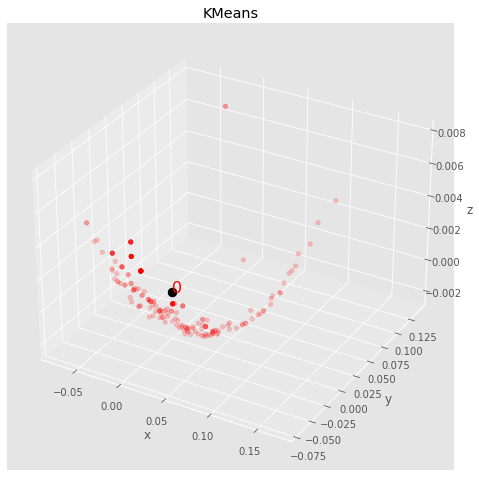

In [50]:
display3d(T, CC, model_1)

In [51]:
corr = df.loc[df['Phase'] == 2, df.columns != 'Phase'].corr()
corr.style.background_gradient(cmap='PiYG').set_precision(2)

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
Zeta1,1.00,-0.65,-0.10,-0.47,-0.51,0.97,-0.15,0.28,-0.06,0.16,0.92
Zeta2,-0.65,1.00,0.48,0.85,0.81,-0.72,0.62,-0.81,-0.55,-0.64,-0.35
Zeta3,-0.10,0.48,1.00,0.36,0.33,-0.23,0.62,-0.75,-0.72,-0.77,0.21
Zeta4,-0.47,0.85,0.36,1.00,0.97,-0.50,0.52,-0.61,-0.40,-0.45,-0.22
Zeta5,-0.51,0.81,0.33,0.97,1.00,-0.52,0.45,-0.53,-0.32,-0.39,-0.28
Zeta6,0.97,-0.72,-0.23,-0.50,-0.52,1.00,-0.29,0.45,0.11,0.31,0.85
Zeta7,-0.15,0.62,0.62,0.52,0.45,-0.29,1.00,-0.80,-0.70,-0.61,0.14
Zeta8,0.28,-0.81,-0.75,-0.61,-0.53,0.45,-0.80,1.00,0.87,0.86,-0.07
Zeta9,-0.06,-0.55,-0.72,-0.40,-0.32,0.11,-0.70,0.87,1.00,0.87,-0.39
Zeta10,0.16,-0.64,-0.77,-0.45,-0.39,0.31,-0.61,0.86,0.87,1.00,-0.16


In [52]:
"""
    for Phase 2  martensite
"""
coeffs_2 = ['Zeta1','Zeta6','Zeta11']
T = scaler().fit_transform( df.loc[df['Phase'] == 2, df.columns.isin(coeffs_2)] )
T

array([[0.83109562, 0.4399976 , 0.34012084],
       [0.82446696, 0.45942233, 0.33043207],
       [0.79299883, 0.5443244 , 0.27361252],
       ...,
       [0.74314247, 0.62629672, 0.23556672],
       [0.68461475, 0.64352801, 0.34230738],
       [0.68461475, 0.64352801, 0.34230738]])

In [53]:
clusters = 1
dims = 3

model_2 = createKMean(T, clusters)

T, CC = makePCA(dims, T, model_2)

[[0.79251146 0.54141901 0.27244531]] 

 [0 0 0 ... 0 0 0]


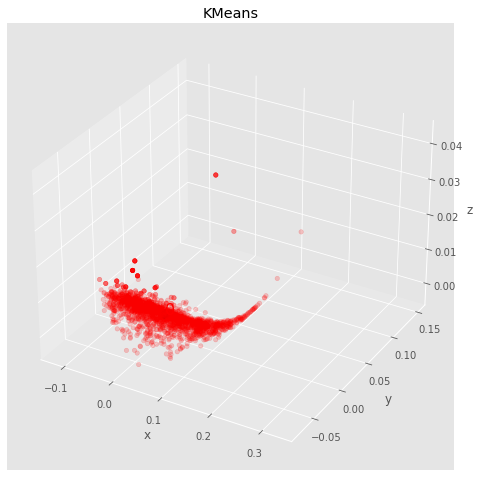

In [54]:
display3d(T, CC, model_2)

In [55]:
corr = df.loc[df['Phase'] == 3, df.columns != 'Phase'].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Zeta1,Zeta2,Zeta3,Zeta4,Zeta5,Zeta6,Zeta7,Zeta8,Zeta9,Zeta10,Zeta11
Zeta1,1.00,-0.62,-0.21,-0.57,-0.67,0.81,-0.16,0.20,0.14,0.20,0.79
Zeta2,-0.62,1.00,0.52,0.86,0.77,-0.84,0.71,-0.76,-0.65,-0.58,-0.19
Zeta3,-0.21,0.52,1.00,0.35,0.33,-0.55,0.63,-0.77,-0.75,-0.54,0.36
Zeta4,-0.57,0.86,0.35,1.00,0.93,-0.60,0.56,-0.47,-0.37,-0.31,-0.31
Zeta5,-0.67,0.77,0.33,0.93,1.00,-0.62,0.47,-0.37,-0.29,-0.23,-0.42
Zeta6,0.81,-0.84,-0.55,-0.60,-0.62,1.00,-0.56,0.71,0.62,0.58,0.33
Zeta7,-0.16,0.71,0.63,0.56,0.47,-0.56,1.00,-0.83,-0.73,-0.50,0.35
Zeta8,0.20,-0.76,-0.77,-0.47,-0.37,0.71,-0.83,1.00,0.93,0.75,-0.40
Zeta9,0.14,-0.65,-0.75,-0.37,-0.29,0.62,-0.73,0.93,1.00,0.85,-0.40
Zeta10,0.20,-0.58,-0.54,-0.31,-0.23,0.58,-0.50,0.75,0.85,1.00,-0.20


In [56]:
"""
    for Phase 3  ferrite
"""
coeffs_3 = ['Zeta8','Zeta9','Zeta10']
T = scaler().fit_transform( df.loc[df['Phase'] == 3, df.columns.isin(coeffs_3)] )
T

array([[4.42876256e-01, 8.91761152e-01, 9.28583279e-02],
       [3.89038515e-01, 9.19675490e-01, 5.33481704e-02],
       [5.66600946e-01, 8.09895405e-01, 1.51765611e-01],
       [5.85363890e-01, 7.99216509e-01, 1.36389475e-01],
       [5.39328978e-01, 8.42095092e-01, 3.29523900e-04],
       [5.16525853e-01, 8.54576680e-01, 5.38492483e-02],
       [4.03268858e-01, 9.14709187e-01, 2.61023232e-02],
       [5.45720265e-01, 8.28701090e-01, 1.24273470e-01],
       [5.38883145e-01, 8.31358706e-01, 1.35822155e-01],
       [5.60633846e-01, 8.17696810e-01, 1.30620122e-01],
       [3.85286245e-01, 9.22180972e-01, 3.37159244e-02],
       [3.69920578e-01, 9.28846268e-01, 2.00842554e-02],
       [5.90606884e-01, 7.95890654e-01, 1.33197503e-01],
       [5.31334700e-01, 8.43502394e-01, 7.86584283e-02],
       [5.03209515e-01, 8.63862883e-01, 2.28276651e-02],
       [5.37409315e-01, 8.39551382e-01, 7.96536588e-02],
       [5.41737504e-01, 8.33179145e-01, 1.11053994e-01],
       [5.99727321e-01, 7.92544

In [57]:
clusters = 1
dims = 3

model_3 = createKMean(T, clusters)

T, CC = makePCA(dims, T, model_3)

[[0.55026259 0.81975422 0.10584528]] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


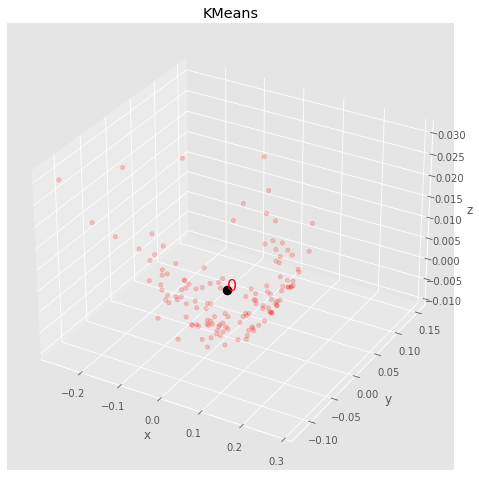

In [58]:
display3d(T, CC, model_3)

In [59]:
import math, random

from geomdl import NURBS
from geomdl import utilities
from geomdl.visualization import VisMPL

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from scipy import ndimage

%matplotlib inline

del coeffs_obj, grains_df, df

In [60]:
degrees = 3

def init_curve():
    curve = NURBS.Curve()
    curve.degree = degrees
    return curve

def get_curve_points(curve):
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    
    points = np.array(curve.evalpts)
    curve.delta = 0.01
    return curve, points

def render_curve_vis(curve):
    curve.vis = VisMPL.VisCurve2D()
    curve.render()

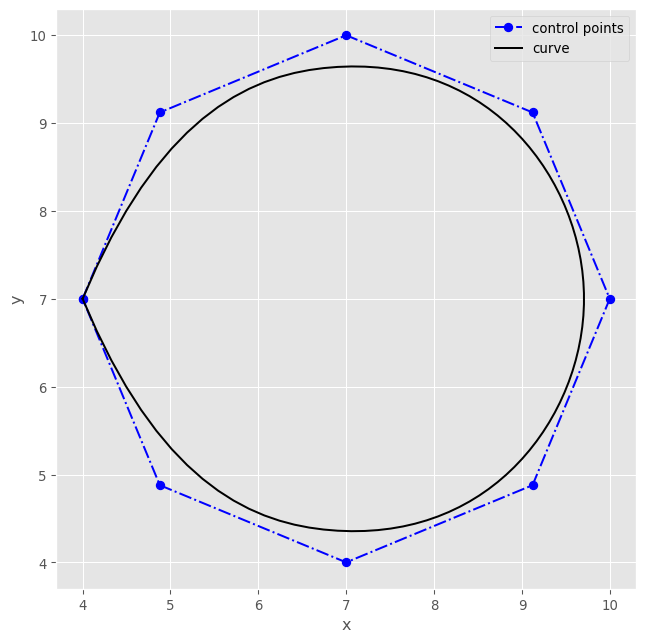

In [61]:
#alfa = 3/4; beta = np.sqrt(3) * alfa; shift = 4  ### hexagon ###
#coords =[[-beta, alfa], [-beta, -alfa], [0, -2*alfa], [beta, -alfa], 
#             [beta, alfa], [0, 2*alfa], [-beta, alfa]]
alfa = 3; beta = alfa * np.sqrt(2)/2; shift = 4  ### octagon ###
coords =[[0, alfa], [alfa-beta, alfa-beta], [alfa, 0], [alfa+beta, alfa-beta], [2*alfa, alfa],
             [alfa+beta, alfa+beta], [alfa, 2*alfa], [alfa-beta, alfa+beta], [0, alfa]]
coords.reverse()

curve = init_curve()
curve.ctrlpts = [[id[0]+shift, id[1]+shift] for id in coords]
curve, crv_points = get_curve_points(curve)

render_curve_vis(curve)

(64, 64)


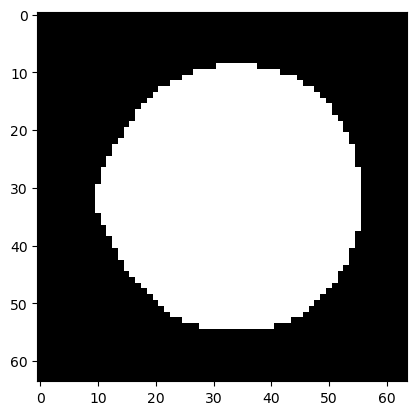

In [62]:
DPI = 16

def make_binarization(points):
    plt.rcParams.update(plt.rcParamsDefault)
    
    fig = Figure(figsize=(4, 4), dpi=DPI)
    canvas = FigureCanvasAgg(fig)
    
    ax = fig.add_subplot(111)
    ax.plot(points[:, 0], points[:, 1], color='k')
    ax.axis('off')
    
    canvas.draw()
    img = np.asarray(canvas.buffer_rgba())
    img = np.where(img < 255, 0, 1)
    img = 1 - img[:, :, 0]
    img = ndimage.binary_fill_holes(img).astype(int)
    img = ndimage.binary_opening(img, structure=struct).astype(int)
    
    return img


image = make_binarization(crv_points)

print(image.shape)

plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [63]:
pt_limit = 6   # pt_limit-1 points
x0 = curve.ctrlpts[1:pt_limit]
g_ctrlpts = curve.ctrlpts[pt_limit:]; g_ctrlpts.insert(0, curve.ctrlpts[0])


def get_xy_from_image(img):
    x = []; y = []
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 1:
                x.append(i); y.append(j)
    
    return np.array(y), np.array(x)

def shape_functions_selection(name, obj):
    if name in ('Zeta8', 'Zeta12'):
        y, x = get_xy_from_image(obj.image)
        data = pd.DataFrame(data={'X': x, 'Y': y, 'grainId_5deg': np.zeros(y.shape)})
        return function_dict[name](obj, data)
    else:
        return function_dict[name](obj)

def return_parametrized_function(shape_coeffs_list, model_cluster_centers):
    #i = 0
    def compute_shape_coeffs_img(x):
        nonlocal shape_coeffs_list, model_cluster_centers #, i, img_tab
        curve = init_curve()
        
        tmp_ctrpts = g_ctrlpts[:]
        [tmp_ctrpts.insert(1+i, list(point)) for i, point \
                             in enumerate(zip(x.tolist()[0::2], x.tolist()[1::2]))]
        curve.ctrlpts = tmp_ctrpts
        _, crv_points = get_curve_points(curve)
        
        image = make_binarization(crv_points)
        m = measure_regionprops(image, image)[0]
        params = [np.array(i) for i in [m.area, m.perimeter, [m.centroid[0]], [m.centroid[1]], \
                                        m.major_axis_length, m.minor_axis_length, m.eccentricity, \
                                        m.equivalent_diameter, m.bbox, m.orientation]]
        coeffs_obj = ShapeCoeffsStored(*params, [0], image)
        
        im_coeffs = []
        for shape_coeff in shape_coeffs_list:
            coeff_val = shape_functions_selection(shape_coeff, coeffs_obj)
            im_coeffs.append(coeff_val)
        
        # L2 norm
        res = math.sqrt(sum([math.pow(coeff - model_cluster_centers[i], 2) for i, coeff in enumerate(im_coeffs)]))
        
        #i += 1
        #if not i%100:
        #    img_tab.append([image, res])
        
        return res
        
    return compute_shape_coeffs_img

In [64]:
from scipy.optimize import minimize

In [65]:
"""
    Phase 1 - cluster 1
"""
#img_tab = []
options  = {'ftol': 1e-9, 'disp': True, 'maxiter': 50}
method   = 'Powell'
function = return_parametrized_function(coeffs_1, model_1.cluster_centers_[0])

solution = minimize(function, x0, method=method, options=options)

Optimization terminated successfully.
         Current function value: 0.112328
         Iterations: 6
         Function evaluations: 1637


In [66]:
x_solution = solution.x.tolist()
x_solution

[-56.559074746600956,
 2.4814074945791758,
 6.6487946405217375,
 10.729353841675922,
 7.014725067360521,
 4.8416621163572096,
 11.327169542628782,
 9.65298820824675,
 9.774016337561422,
 5.597843213465767]

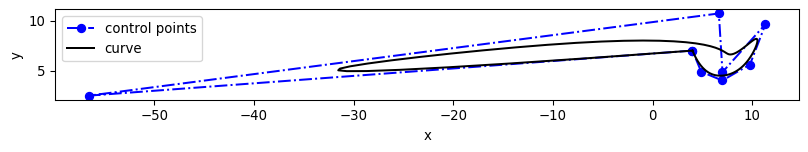

In [67]:
def fully_visualize_curve(x):
    curve = init_curve()
    ctr_ps = g_ctrlpts[:]
    [ctr_ps.insert(1+i, list(pt)) for i, pt \
                         in enumerate(zip(x[0::2], x[1::2]))]
    curve.ctrlpts = ctr_ps
    curve, crv_points = get_curve_points(curve)
    
    render_curve_vis(curve)
    
    return curve


curve = fully_visualize_curve(x_solution)

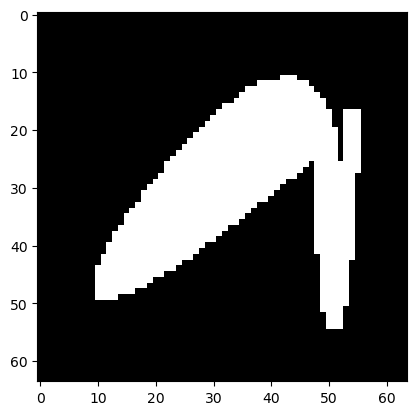

In [68]:
image_1 = make_binarization(np.array(curve.evalpts))
plt.imshow(image_1, cmap=plt.cm.gray)
plt.savefig('phase_1.jpg')
plt.show()

In [69]:
"""
    Phase 2 - cluster 1
"""
#img_tab = []
function = return_parametrized_function(coeffs_2, model_2.cluster_centers_[0])

solution = minimize(function, x0, method=method, options=options)

Optimization terminated successfully.
         Current function value: 0.143198
         Iterations: 4
         Function evaluations: 1073


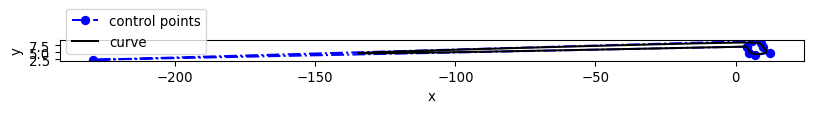

In [70]:
x_solution = solution.x.tolist()
curve = fully_visualize_curve(x_solution)

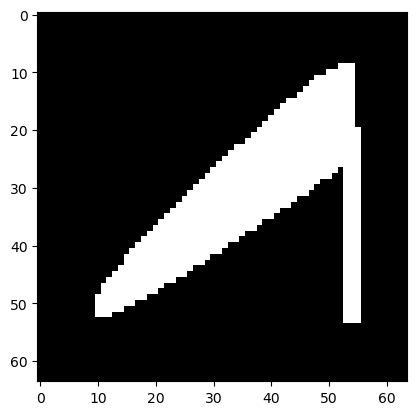

In [71]:
image_2 = make_binarization(np.array(curve.evalpts))
plt.imshow(image_2, cmap=plt.cm.gray)
plt.savefig('phase_2.jpg')
plt.show()

In [72]:
"""
    Phase 3 - cluster 1
"""
#img_tab = []
function = return_parametrized_function(coeffs_3, model_3.cluster_centers_[0])

solution = minimize(function, x0, method=method, options=options)

Optimization terminated successfully.
         Current function value: 0.559475
         Iterations: 4
         Function evaluations: 1352


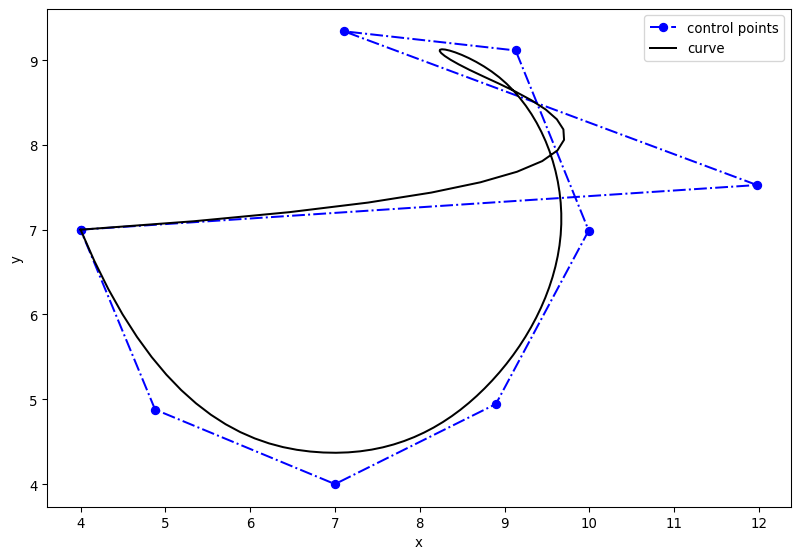

In [73]:
x_solution = solution.x.tolist()
curve = fully_visualize_curve(x_solution)

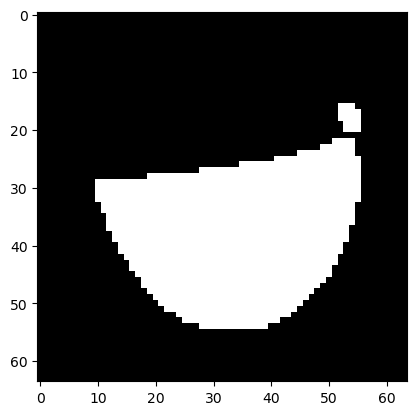

In [74]:
image_3 = make_binarization(np.array(curve.evalpts))
plt.imshow(image_3, cmap=plt.cm.gray)
plt.show()

In [75]:
del coeffs_1, model_1, coeffs_2, model_2, coeffs_3, model_3


def get_grain_image_proportion(phase_mean_area, image_area):
    result = round(phase_mean_area/image_area, 4)
    
    return result

def resize_image(array, scale_factor):
    img = Image.fromarray(np.uint8(array * 255) , 'L')
    scale = int(array.shape[0] * math.sqrt(scale_factor))
    img = img.resize((scale, scale))
    thresh_img = cv2.threshold(np.uint8(img), 5, 1, cv2.THRESH_OTSU)[1]
    
    return thresh_img

In [76]:
image_1_area = cv2.countNonZero(image_1)
image_2_area = cv2.countNonZero(image_2)
image_3_area = cv2.countNonZero(image_3)

print('Phases: 1   2   3')
print('Mean areas:', image_1_area, image_2_area, image_3_area)

proportion_1 = get_grain_image_proportion(phase_1_mean_area, image_1_area)
proportion_2 = get_grain_image_proportion(phase_2_mean_area, image_2_area)
proportion_3 = get_grain_image_proportion(phase_3_mean_area, image_3_area)

print('Proportions:', proportion_1, proportion_2, proportion_3)

Phases: 1   2   3
Mean areas: 916 743 1056
Proportions: 0.0125 0.2082 1.4004


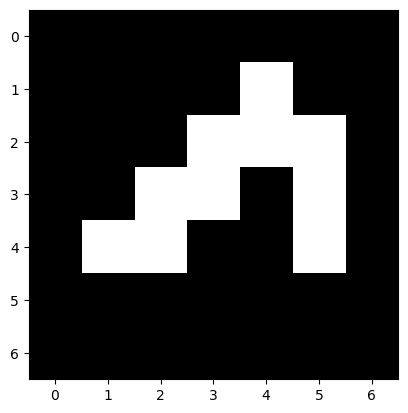

In [77]:
image_1 = resize_image(image_1, proportion_1)
plt.imshow(image_1, cmap=plt.cm.gray)
plt.show()

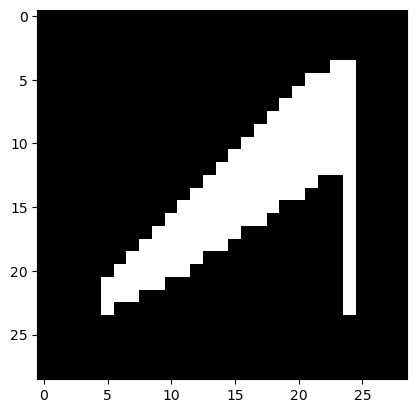

In [78]:
image_2 = resize_image(image_2, proportion_2)
plt.imshow(image_2, cmap=plt.cm.gray)
plt.show()

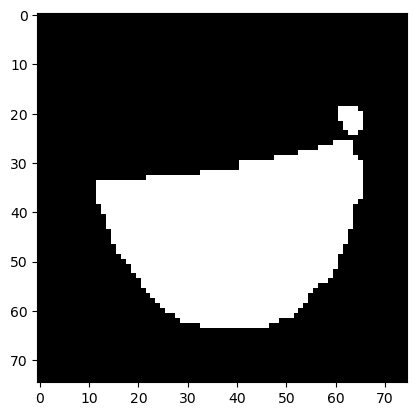

In [79]:
image_3 = resize_image(image_3, proportion_3)
plt.imshow(image_3, cmap=plt.cm.gray)
plt.show()

In [80]:
total_phase_area = sum([phase_1_area, phase_2_area, phase_3_area])
phase_1_percentage = round(phase_1_area/total_phase_area, 3)
phase_2_percentage = round(phase_2_area/total_phase_area, 3)
phase_3_percentage = round(phase_3_area/total_phase_area, 3)

phase_1_grains_amount = int(round(phase_1_area_after/phase_1_mean_area))
phase_2_grains_amount = int(round(phase_2_area_after/phase_2_mean_area))
phase_3_grains_amount = int(round(phase_3_area_after/phase_3_mean_area))

print("Phase 1 area:", phase_1_area, "Phase 2 area:", phase_2_area, "Phase 3 area:", phase_3_area)
print("In summary: ", total_phase_area)
print("Part-per-thousand: ", phase_1_percentage, phase_2_percentage, phase_3_percentage)
print("Number of grains: ", phase_1_grains_amount, phase_2_grains_amount, phase_3_grains_amount, "(checkout)")

Phase 1 area: 8086 Phase 2 area: 754700 Phase 3 area: 763689
In summary:  1526475
Part-per-thousand:  0.005 0.494 0.5
Number of grains:  211 2107 134 (checkout)


In [81]:
def add_channel_to_image(img, number):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    new_img = np.zeros(rgb_img.shape)
    cell = np.zeros((3)); cell[number] = 255
    
    new_img[[rgb_img[:,:,number] == 1]] = cell
    
    return np.uint8(new_img)


image_1 = add_channel_to_image(image_1, 0)
image_2 = add_channel_to_image(image_2, 1)
image_3 = add_channel_to_image(image_3, 2)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


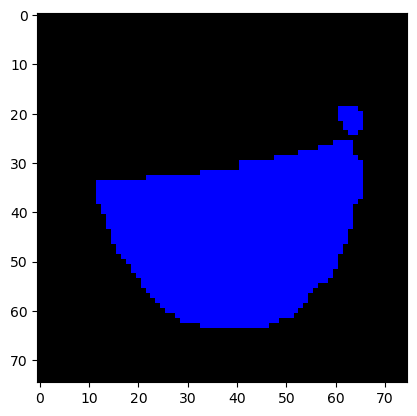

In [82]:
plt.imshow(image_1, cmap=cmap)
plt.savefig('image_1.jpg')

plt.imshow(image_2, cmap=cmap)
plt.savefig('image_2.jpg')

plt.imshow(image_3, cmap=cmap)
plt.savefig('image_3.jpg')

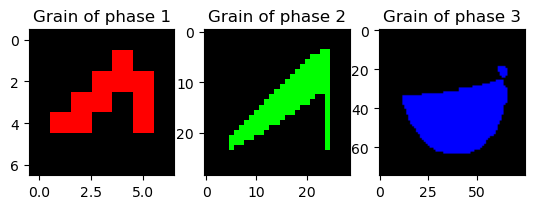

In [83]:
fig = plt.figure()

fig.add_subplot(131)
plt.imshow(image_1, cmap=cmap)
plt.title('Grain of phase 1')
fig.add_subplot(132)
plt.imshow(image_2, cmap=cmap)
plt.title('Grain of phase 2')
fig.add_subplot(133)
plt.imshow(image_3, cmap=cmap)
plt.title('Grain of phase 3')

plt.show()

In [84]:
def overlay_image(img, img_overlay, x, y):
    """
        Function inspired by stackoverflow: 
    https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv/45118011
    """
    # Image & overlay ranges
    y1, y2 = max(0, y), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x), min(img.shape[1], x + img_overlay.shape[1])
    
    y1o, y2o = max(0, -y), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x), min(img_overlay.shape[1], img.shape[1] - x)
    
    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return
    
    # Blend overlay within the determined ranges
    for c in range(3):
        if c == background:
            continue
        else:
            img[y1:y2, x1:x2, c] = np.where(img_overlay[y1o:y2o, x1o:x2o, c] > 0, \
                                            img_overlay[y1o:y2o, x1o:x2o, c], img[y1:y2, x1:x2, c])
            img[y1:y2, x1:x2, background] = np.where(img_overlay[y1o:y2o, x1o:x2o, c] > 0, \
                                                     np.zeros(img_overlay[y1o:y2o, x1o:x2o, c].shape), \
                                                     img[y1:y2, x1:x2, background])


In [85]:
# taking ferrit as background
background = 2  # blue = ferrit
lenght = 50
dims = list((lenght,lenght)); dims.append(3)
new_image = np.uint8(np.zeros(dims))
new_image[:,:,background] = 255

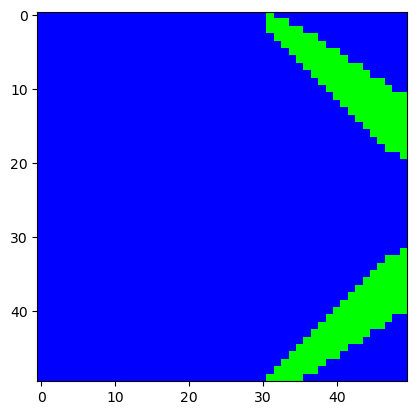

In [86]:
if flag:
    overlay_image(new_image, np.flipud(image_2), int(lenght/2), 0)
    overlay_image(new_image, image_2, int(lenght/2), int(lenght/2)+2)
else:
    overlay_image(new_image, np.flipud(image_2), int(lenght/2)+1, -5)
    overlay_image(new_image, image_2, int(lenght/2)+1, int(lenght/2)+3)

plt.imshow(new_image, cmap=cmap)
plt.show()

In [87]:
image_2v2 = image_2.copy()
tmp = resize_image(image_2v2[:,:,1], 0.5)
tmp = add_channel_to_image(tmp, 1)
tmp = np.fliplr(np.flipud(tmp))

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


In [88]:
print('Before:', cv2.countNonZero(image_2v2[:,:,1]), cv2.countNonZero(tmp[:,:,1]))
if flag:
    overlay_image(image_2v2, tmp, 2, 2)
else:
    overlay_image(image_2v2, tmp, 2, 0)
print('After:', cv2.countNonZero(image_2v2[:,:,1]))

Before: 142 60
After: 202


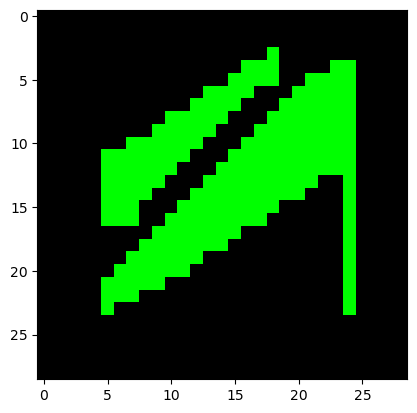

In [89]:
plt.imshow(image_2v2, cmap=cmap)
plt.show()

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


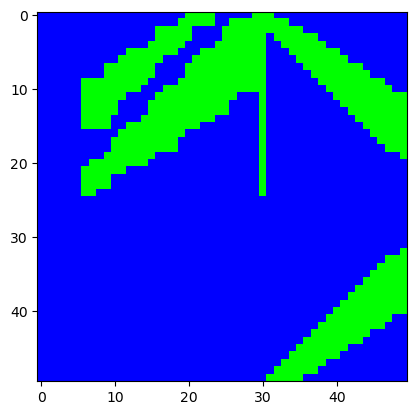

In [90]:
if flag:
    image_2v2 = resize_image(image_2v2[:,:,1], 1.7)
    image_2v2 = add_channel_to_image(image_2v2, 1)
    overlay_image(new_image, image_2v2, -5, -5)
else:
    image_2v2 = resize_image(image_2v2[:,:,1], 1.6)
    image_2v2 = add_channel_to_image(image_2v2, 1)
    overlay_image(new_image, image_2v2, 0, -5)

plt.imshow(new_image, cmap=cmap)
plt.show()

In [91]:
image_2v3 = np.zeros((image_2.shape[0], image_2.shape[1]*2, 3))

tmp = np.flipud(image_2.copy())
tmp = resize_image(tmp[:,:,1], 2)
tmp = add_channel_to_image(tmp, 1)
overlay_image(image_2v3, tmp, -6, -6)

tmp = np.fliplr(tmp)
overlay_image(image_2v3, tmp, 24, -6)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


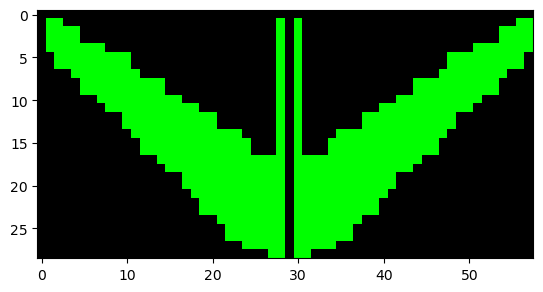

In [92]:
plt.imshow(image_2v3, cmap=cmap)
plt.show()

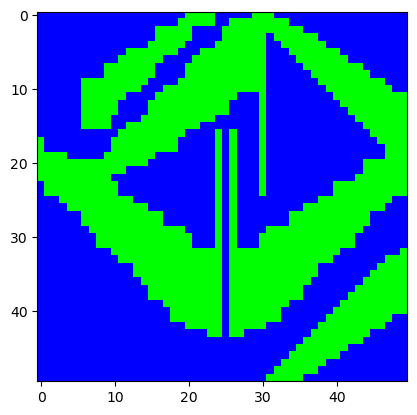

In [93]:
if flag:
    overlay_image(new_image, image_2v3, -2, 18)
else:
    overlay_image(new_image, image_2v3, -4, 15)

plt.imshow(new_image, cmap=cmap)
plt.show()

In [94]:
image_1v2 = image_1.copy()
image_1v2 = resize_image(image_1v2[:,:,0], 1.5)
image_1v2 = add_channel_to_image(image_1v2, 0)
if flag:
    overlay_image(new_image, image_1v2, 24, 43)
else:
    overlay_image(new_image, image_1v2, 25, 43)

/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_55205/2856970279.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_img[[rgb_img[:,:,number] == 1]] = cell


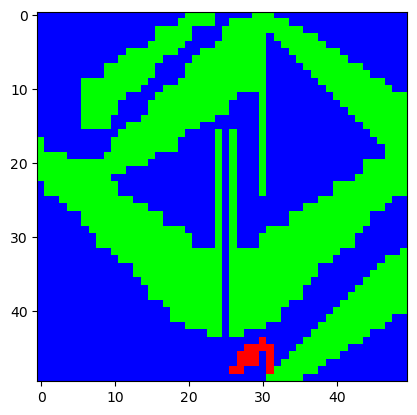

In [95]:
plt.imshow(new_image, cmap=cmap)
plt.show()

In [96]:
image_area = new_image.shape[0] * new_image.shape[1]
phase_1_percentage = round(cv2.countNonZero(new_image[:,:,0]) / image_area, 3)
phase_2_percentage = round(cv2.countNonZero(new_image[:,:,1]) / image_area, 3)
phase_3_percentage = round(cv2.countNonZero(new_image[:,:,2]) / image_area, 3)

print("Part-per-thousand: ", phase_1_percentage, phase_2_percentage, phase_3_percentage)

Part-per-thousand:  0.006 0.421 0.573


In [97]:
def match_if_border(img, x, y): # in fact x is y, y is x
    if x-1 >= 0 and y-1 >= 0 and (img[x-1,y-1,0] != 0 or img[x-1,y-1,2] != 0):
        return True
    if y-1 >= 0 and (img[x,y-1,0] != 0 or img[x,y-1,2] != 0):
        return True
    if x+1 < img.shape[0] and y-1 > 0 and (img[x+1,y-1,0] != 0 or img[x+1,y-1,2] != 0):
        return True
    if x+1 < img.shape[0] and (img[x+1,y,0] != 0 or img[x+1,y,2] != 0):
        return True
    if x+1 < img.shape[0] and y+1 < img.shape[1] and (img[x+1,y+1,0] != 0 or img[x+1,y+1,2] != 0):
        return True
    if y+1 < img.shape[1] and (img[x,y+1,0] != 0 or img[x,y+1,2] != 0):
        return True
    if x-1 >= 0 and y+1 < img.shape[1] and (img[x-1,y+1,0] != 0 or img[x-1,y+1,2] != 0):
        return True
    if x-1 >= 0 and (img[x-1,y,0] != 0 or img[x-1,y,2] != 0):
        return True
    if x-1 < 0 or y-1 < 0 or x+1 == img.shape[0] or y+1 == img.shape[1]:
        return True
    else:
        return False

def match_border_as_black(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j,1] == 255 and match_if_border(image, i, j):
                image[i,j,1] = 0

In [98]:
new_image_border = new_image.copy()
match_border_as_black(new_image_border)

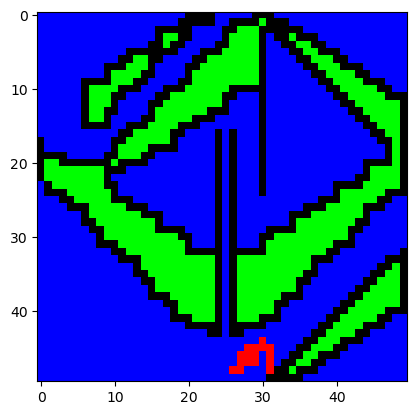

In [99]:
plt.imshow(new_image_border, cmap=cmap)
plt.savefig('new_image_border.jpg')
plt.show()

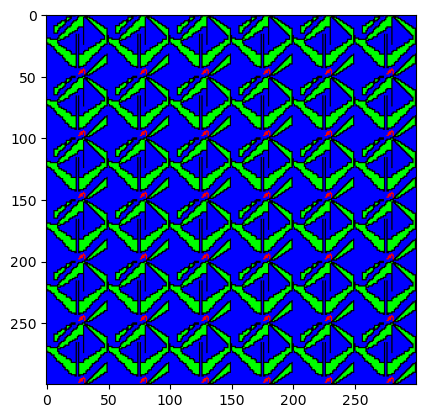

In [100]:
n_dims = 6
multiplied_new_image = np.tile(new_image_border, (n_dims,n_dims,1))

plt.imshow(multiplied_new_image, cmap=cmap)
plt.savefig('final.jpg')
plt.show()

In [101]:
# for extra work
def multi_visualize(rows_num, cols_num):
    fig, ax = plt.subplots(rows_num, cols_num, sharex='col', sharey='row')
    
    for i in range(rows_num):
        for j in range(cols_num):
            tab_inx = i * cols_num + j
            
            if tab_inx == len(img_tab):
                break
            
            ax[i, j].imshow(img_tab[tab_inx][0], cmap=plt.cm.gray)
            ax[i, j].set_title(str(round(img_tab[tab_inx][1], 9)), fontsize=6)
    
    plt.show()


#cols_num = 5
#rows_num = math.ceil(len(img_tab)/cols_num)

#multi_visualize(rows_num, cols_num)